In [21]:
import os
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [22]:
dataset = './Rice_Image_Dataset/'
images = []
class_name = []
list_name = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

for i, rice_type in enumerate(os.listdir(dataset)):
    for j, file_name in enumerate(os.listdir(os.path.join(dataset, rice_type))):
        img = load_img(os.path.join(dataset, rice_type, file_name))
        img = img_to_array(img)
        img = tf.image.rgb_to_grayscale(img)
        img = img / 255
        class_name.append(i)
        images.append(img)
        if j > 500:
            break
        print('file name:', file_name, 'from type:', rice_type)

file name: Arborio (114).jpg from type: Arborio
file name: Arborio (1140).jpg from type: Arborio
file name: Arborio (11400).jpg from type: Arborio
file name: Arborio (11401).jpg from type: Arborio
file name: Arborio (11402).jpg from type: Arborio
file name: Arborio (11403).jpg from type: Arborio
file name: Arborio (11404).jpg from type: Arborio
file name: Arborio (11405).jpg from type: Arborio
file name: Arborio (11406).jpg from type: Arborio
file name: Arborio (11407).jpg from type: Arborio
file name: Arborio (11408).jpg from type: Arborio
file name: Arborio (11409).jpg from type: Arborio
file name: Arborio (1141).jpg from type: Arborio
file name: Arborio (11410).jpg from type: Arborio
file name: Arborio (11411).jpg from type: Arborio
file name: Arborio (11412).jpg from type: Arborio
file name: Arborio (11413).jpg from type: Arborio
file name: Arborio (11414).jpg from type: Arborio
file name: Arborio (11415).jpg from type: Arborio
file name: Arborio (11416).jpg from type: Arborio
file

In [23]:
y = tf.keras.utils.to_categorical(class_name,num_classes=len(list_name))

In [24]:
images = np.asarray(images)

x_train, x_temp,y_train,y_temp = train_test_split(images,y,test_size = 0.2, random_state=69)
x_test, x_val,y_test, y_val = train_test_split(x_temp,y_temp, test_size=0.5, random_state=69)

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3,3),strides=(1,1),padding = 'same', activation='relu', input_shape=(250,250,1)),
    tf.keras.layers.Conv2D(32, kernel_size=(3,3),strides=(1,1),padding = 'same', activation='relu', input_shape=(250,250,1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(28,activation='relu'),
    tf.keras.layers.Dense(14,activation='relu'),
    tf.keras.layers.Dense(5,activation='softmax'),
])


In [26]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [27]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 250, 250, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 250, 250, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 125, 125, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 125, 125, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 500000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 28)             │    14,000,028 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 14)             │           406 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │            75 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,010,077 (53.44 MB)

 Trainable params: 14,010,077 (53.44 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)
history = model.fit(
    x_train,
    y_train,
    epochs = 10,
    validation_data=(x_val,y_val),
    callbacks = [early_stop]
)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 373ms/step - accuracy: 0.8504 - loss: 0.2427 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 354ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 370ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 369ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


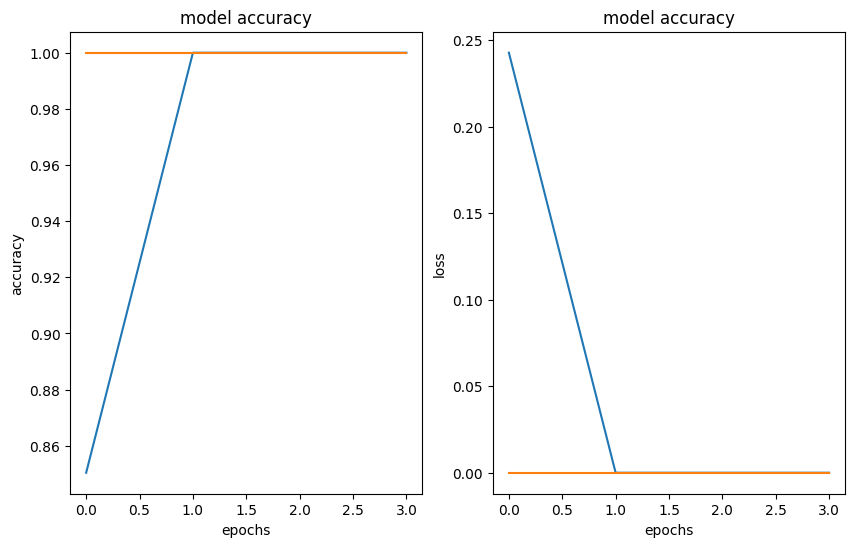

In [30]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')

plt.show()